<a href="https://colab.research.google.com/github/Peeyush2027/Telecom-churn-analysis/blob/main/CH_Peeyush_Jain_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [2]:
#Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
file_path='/content/drive/MyDrive/Almabetter assignments/Module 1- Python/Capstone Project/Capstone project-1 ( Telecom )/Copy of Telecom Churn.csv'
df=pd.read_csv(file_path)

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
df1= df[['Churn','State','Account length','Area code','International plan','Number vmail messages','Total night minutes','Total night calls','Total night charge','Customer service calls']]

In [9]:
df2= pd.DataFrame(df1.groupby(['Churn','State'])['Customer service calls'].sum())

In [10]:
# State wise distribution of customer service calls for true & false churn

df2 = pd.DataFrame(df2.unstack())
df2

Customer service calls                       ...                           
State                     AK   AL  AR  AZ  CA  CO  ...   VA   VT  WA  WI   WV  WY
Churn                                              ...                           
False                     71  101  67  93  34  95  ...  115  104  72  98  131  94
True                      10   24  42   9  16  23  ...    8   23  29  13   28  17

[2 rows x 51 columns]

In [11]:
df2.loc[True].sort_values(ascending=False)[:10]

                        State
Customer service calls  AR       42
                        MN       41
                        NY       40
                        MI       39
                        NJ       39
                        MD       38
                        MT       36
                        MS       32
                        TX       30
                        NV       30
Name: True, dtype: int64

Text(0.5, 0, 'Churn-True')

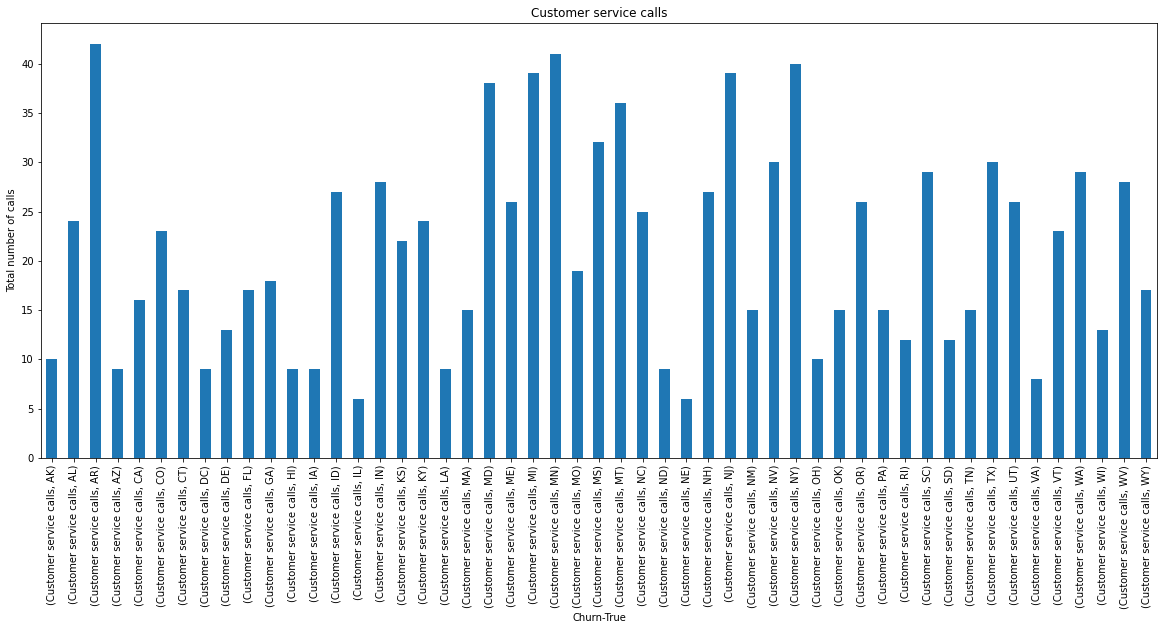

In [12]:
state_true= df2.loc[True]
plt.rcParams['figure.figsize'] = (20, 8)
state_true.plot(kind='bar')

plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn-True')

In [13]:
# Total customer service calls as per the churning and churning rate:

df3 = pd.DataFrame(df.groupby('Churn')['Customer service calls'].sum())

churning_rate=(df[df['Churn']==True]['Churn'].count()/df['Churn'].count())*100
print('The rate of churning is',churning_rate)
df3

The rate of churning is 14.491449144914492


,Customer service calls
Churn,
False,4132
True,1077


Text(0.5, 0, 'Churn')

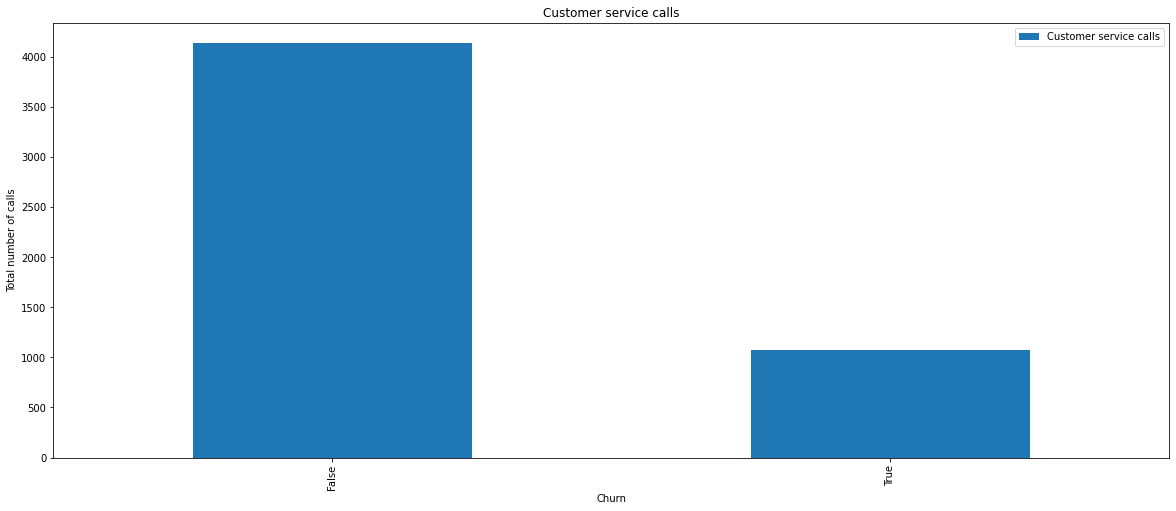

In [14]:
df3.plot(kind='bar')

plt.title('Customer service calls')
plt.ylabel('Total number of calls')
plt.xlabel('Churn')

In [15]:
# Avg. service calls for true and false churning:

avg_false_sc = df[df['Churn']==False]['Customer service calls'].sum()/df[df['Churn']==False]['Churn'].count()
print('avg. service calls for False churn', avg_false_sc)

avg_true_sc = df[df['Churn']==True]['Customer service calls'].sum()/df[df['Churn']==True]['Churn'].count()
print('avg. service calls for True churn', avg_true_sc)

percent_diff = ((avg_true_sc-avg_false_sc)/avg_false_sc)*100
print(f'avg service calls in True churning is {round(percent_diff)}% more than false churning')

avg. service calls for False churn 1.4498245614035088
avg. service calls for True churn 2.229813664596273
avg service calls in True churning is 54% more than false churning


In [16]:
# Avg call length in during night calls: 

avg_false_call = df[df['Churn']==False]['Total night minutes'].sum()/df[df['Churn']==False]['Total night calls'].sum()
print('avg. call length for false', avg_false_call)

avg_true_call = df[df['Churn']==True]['Total night minutes'].sum()/df[df['Churn']==True]['Total night calls'].sum()
print('avg. call length for true', avg_true_call)

# There is no difference


avg. call length for false 2.000166920320094
avg. call length for true 2.0441486400098983


In [178]:
# per_min_charge = df[df['Churn']==False]['Total night charge'].sum()/df[df['Churn']==False]['Total night minutes'].sum()
# per_min_charge

0.04500039973379132

In [179]:
# per_min_charge = df[df['Churn']==True]['Total night charge'].sum()/df[df['Churn']==True]['Total night minutes'].sum()
# per_min_charge

0.04500049935991139

In [17]:
# Avg call length for true and false churning for total minute and total calls done:

df4 = df[df['Churn']==True]
df5 = df[df['Churn']==False]

In [44]:
df4['total_mins']=df4['Total day minutes']+df4['Total eve minutes']+df4['Total night minutes']
df4['total_calls']=df4['Total day calls']+df4['Total eve calls']+df4['Total night calls']

df5['total_mins']=df5['Total day minutes']+df5['Total eve minutes']+df5['Total night minutes']
df5['total_calls']=df5['Total day calls']+df5['Total eve calls']+df5['Total night calls']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [45]:
avg1 = df4['total_mins'].sum()/df4['total_calls'].sum()
print('avg call length of false churn',avg1)
avg2 = df5['total_mins'].sum()/df5['total_calls'].sum()
print('avg call length of true churn',avg2)

avg call length of false churn 2.0660404495613283
avg call length of true churn 1.9120855104002765


In [99]:
# Voice mail plan vs churn :

df6 = df.groupby(['Churn', 'Voice mail plan'])['Voice mail plan'].count()
print(df6.unstack())
vmp_yes_true = (df6.unstack().loc[True,'Yes'] / df6.unstack().loc[True].sum())*100

vmp_yes_false = (df6.unstack().loc[False,'Yes'] / df6.unstack().loc[False].sum())*100
print(vmp_yes_true,vmp_yes_false)

Voice mail plan    No  Yes
Churn                     
False            2008  842
True              403   80
16.563146997929607 29.543859649122805


Text(0, 0.5, 'voice mail plan no')

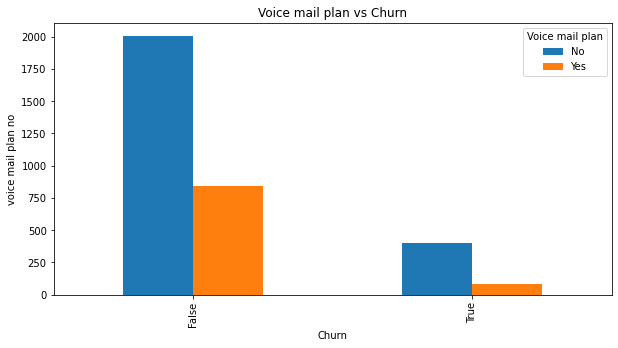

In [101]:
df6.unstack().plot(kind='bar')
plt.title('Voice mail plan vs Churn')
plt.xlabel('Churn')
plt.ylabel('voice mail plan no')

In [37]:
#  Vmail msg vs churn

df7 = df.groupby(['Churn'])['Number vmail messages'].mean()
df7

Churn
False    8.604561
True     5.115942
Name: Number vmail messages, dtype: float64

Text(0, 0.5, 'Number vmail message')

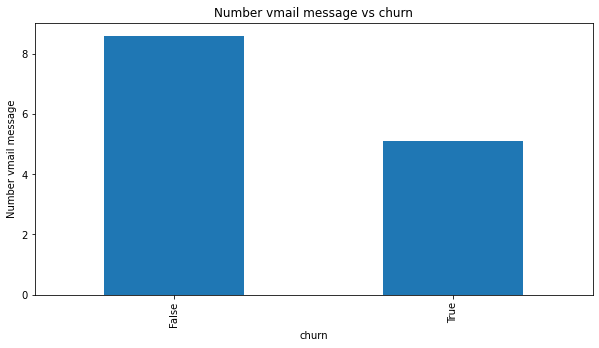

In [40]:
plt.rcParams['figure.figsize'] = (10, 5)
df7.plot(kind='bar')
plt.title('Number vmail message vs churn')
plt.xlabel('churn')
plt.ylabel('Number vmail message')

In [24]:
df8 = df.groupby(['Churn','International plan'])['International plan'].count()
df8

Churn  International plan
False  No                    2664
       Yes                    186
True   No                     346
       Yes                    137
Name: International plan, dtype: int64

Text(0, 0.5, 'International plan')

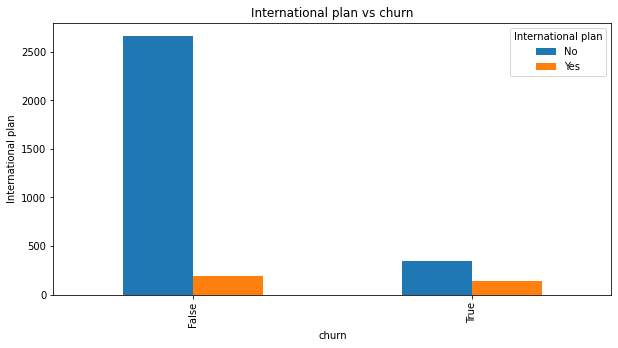

In [26]:
plt.rcParams['figure.figsize'] = (10, 5)
df8.unstack().plot(kind='bar')
plt.title('International plan vs churn')
plt.xlabel('churn')
plt.ylabel('International plan')

1. Statewise churning counts - done
2. Intl plan vs churning - done
3. voice mail plan vs churning - done
4. customer service calls vs churning - done
5. reasons of churning in top 10 states - 
6. call charges for day/ night/ eve - 
7. avg call charges/mins - 
8. 